# A. Physical Lecture: Minimum Variance Frontier: Constrained



## A.1 Set-up

An investor considers an investment into three already well diversified exchange traded funds. Asset 1 has an expected return of 3%, a volatility of 4% and pairwise correlations to asset 2 and 3 of 10% and 20%, respectively. Asset 2 has an expected return of 6%, a volatility of 13% and a pairwise correlation with asset 3 of 70%.  Asset 3 has an expected return of 8% and a volatility of 16%.

The investor wants to inspect a subset of minimum variance portfolios. The subset of interest must not contain any short sale positions and none of the positions shall make up more than 90% of the investment. 

## A.2  Code Requirements
 
We need numpy for algebra, scipy.optimize for the numerical optimization and matplotlib for plotting.

In [1]:
import numpy as np    

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy.optimize 

## A.3 Investment Opportunity Set

In [4]:
 mu = np.array([
                [0.03],
                 [0.06],
                 [0.08]
                 ]
                 )

In [5]:
Sigma = np.array([
                    [0.04**2,         0.04*0.13*0.1, 0.04*0.16*0.2],
                    [0.04*0.13*0.1,  0.13**2,        0.13*0.16*0.7],
                    [0.04*0.16*0.2,  0.13*0.16*0.7, 0.16**2]    
                    ])

## A.4 Objective Function

Now, we define the objective function that the investor wants to optimize. In our application that is the portfolio variance (as a function of the portfolio weights). The objective function needs to return a scalar value.  

In [6]:
 def portfolio_variance(w):
        return (w.T @ Sigma @ w).item()

## A.5 Equality Constraints of Optimization Problem

Now, we set-up functions for the equality constraints of the optimization problem. 

We re-write equality constraints of the problem as

$$
f(x) = 0
$$  



### A.5.1 Full Investment Constraint

We start with the full investment constraint

In [7]:
 def full_investment_constraint(w):
        return np.sum(w) - 1

### A.5.2 Target Return Constraint

We continue with the target portfolio return constraint. 

Notice: the next line is a quick and dirty way of coding. It is dirty because it uses a "global variable", here mu_target, which as of now is not defined. Yet, Python accepts that as it only requires to know that global quantity once it executes the function for the first time

In [8]:
def target_return_constraint(w):
    return (w.T @ mu).item() - mu_target

## A.6 Starting Value for Parameter Search

We set the starting value for the three dimensional parameter space to 

$$
w_0 = [0.4, 0, 0.6].
$$

Important: Ensure the starting values of an optimization problem fullfill the constraints.

In [9]:
 w0 = [0.4, 0, 0.6]

## A.7 Set Parameter Bounds for Individual Parameters

We set the bounds, which coincide with constraints on single parameters, here

$$
0 \leq w_j \leq 0.9
$$ 

In [10]:
 bounds = [
             (0, 0.9),
             (0, 0.9),
             (0, 0.9)
             
 ]

## A.8 Set Constraints on a Combination of Parameters

We set constraints, which coincide with functions on several parameters. 

Here, that is the **full investment constraint** and the **target return constraint**. 

The normed structure follows https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In our application, we say to work with 'equality constraints' that are parsed as 'functions'

In [16]:
constraints = [ 
                { 'type': 'eq', 'fun': target_return_constraint }, 
                { 'type': 'eq', 'fun': full_investment_constraint }
              ]

## A.9 Setting Target (Expected) Returns for which we compute the MV-Frontier

Now, we define a set of target returns for which we want to find the minimum variance portfolio that fullfills the constraints. 

We set the range of target expected returns as **(lower bound, increment, upper bound)**, for which we seek to find the minimum variance portfolio. 

Notice, not all target returns can be reached due to the specific constraints. For example, in our current example, an expected portfolio return of 10% is not possible since shorting is not allowed and the highest single asset expected return is 8%. We can easily see that the achievable **lower bound** is 

$$
3.3\%=0.9 * 3\% + 0.1 * 6\%
$$

and the achievable **upper bound** is

$$
7.8\% = 0.9 * 8\% +0.1 * 6\%
$$

This allows us to set natural lower and upper bounds. As to the increments, we work with 10 basis points, i.e.

$$
incr = 0.1\%
$$
 

In [42]:
 mu_LB = 0.033   

In [43]:
 mu_UB = 0.078

In [44]:
incr  = 0.001 

## A.10 Computing the Constrained Minimum-Variance Frontier

We now loop through all traget returns to find the resulting constrained minimum variance portfolio. We store the portfolio weights in a variable 

$$
\text{w_cmv},
$$

the expected returns of the portfolios in

$$
\text{mu_cmv},
$$

and their volatility in

$$
\text{sigma_cmv}
$$

In [45]:
 n = int( 1 + (mu_UB - mu_LB)/incr)

In [46]:
w_cmv = np.zeros(
                   (n,3)         
)

In [47]:
mu_cmv = np.zeros(
                    (n,1)
)

In [48]:
sigma_cmv = np.zeros(
                        (n,1)
) 

In [49]:
mu_target = mu_LB
for i in range(0,n):
    w_opt = scipy.optimize.minimize(portfolio_variance, w0, bounds=bounds, constraints=constraints)
    w_cmv[i,:] = w_opt.x
    mu_cmv[i,0] = (w_cmv[i,:] @ mu).item()
    sigma_cmv[i,0] = (w_cmv[i,:] @ Sigma @ w_cmv[i,:].T).item()**0.5
    
    mu_target += incr

In [51]:
w_cmv

array([[9.00000000e-01, 1.00000000e-01, 1.16607163e-13],
       [9.00000000e-01, 5.00000058e-02, 4.99999942e-02],
       [8.59096107e-01, 1.02259731e-01, 3.86441620e-02],
       [8.38723290e-01, 1.03191775e-01, 5.80849346e-02],
       [8.18350478e-01, 1.04123805e-01, 7.75257169e-02],
       [7.97977669e-01, 1.05055829e-01, 9.69665026e-02],
       [7.77604856e-01, 1.05987858e-01, 1.16407285e-01],
       [7.57232044e-01, 1.06919890e-01, 1.35848066e-01],
       [7.36859234e-01, 1.07851916e-01, 1.55288850e-01],
       [7.16486421e-01, 1.08783946e-01, 1.74729633e-01],
       [6.96113602e-01, 1.09715994e-01, 1.94170404e-01],
       [6.75740779e-01, 1.10648054e-01, 2.13611167e-01],
       [6.55367982e-01, 1.11580046e-01, 2.33051972e-01],
       [6.34995165e-01, 1.12512089e-01, 2.52492746e-01],
       [6.14622356e-01, 1.13444109e-01, 2.71933535e-01],
       [5.94249531e-01, 1.14376173e-01, 2.91374296e-01],
       [5.73876706e-01, 1.15308236e-01, 3.10815058e-01],
       [5.53503902e-01, 1.16240

## A.12 Plotting the Constrained Minimum Variance Frontier

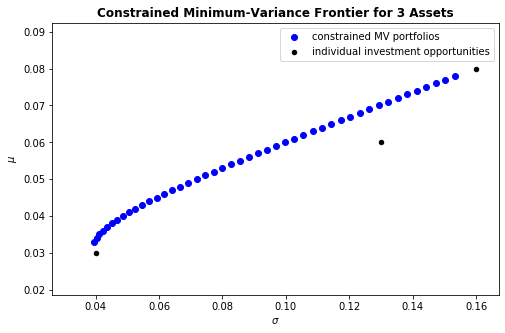

In [53]:
plt.figure(figsize =(8,5))

plt.scatter(sigma_cmv, mu_cmv, color='blue', label='constrained MV portfolios')

plt.scatter(np.diag(Sigma)**0.5, mu[:,0], s=20, color='black', label='individual investment opportunities')

plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')

plt.title('Constrained Minimum-Variance Frontier for 3 Assets', fontweight='bold')

plt.legend()

plt.show()